In [29]:
import json as js
import glob
import sys
import copy

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction import text 
from sklearn.cluster import KMeans, MiniBatchKMeans

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

In [5]:
import numpy as np
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool

In [6]:
import os
from copy import deepcopy
import time
import datetime

In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/g/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# USE THIS FOR MAPPING
# Get basemap from https://github.com/matplotlib/basemap/releases/
# Install with instructions from https://matplotlib.org/basemap/users/installing.html
# OR on mac: brew install geos
# AND then: pip3 install --user git+https://github.com/matplotlib/basemap.git
from mpl_toolkits.basemap import Basemap, cm
# This also requires netcdf4 -- to install use "pip3 install netcdf4"
from netCDF4 import Dataset as NetCDFFile

In [10]:
additional_stop_words = [''] ##USE THIS FOR STOP WORDS
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [11]:
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in tokenizer.tokenize(doc)]

In [12]:
directory = './data/*'

## LOAD TWEET OBJECTS

In [13]:
tweet_objects = []
dirs = glob.glob(directory)
for dr in dirs:
    files = glob.glob(dr+'/*')
    for f in files:
            fin = open(f,'r')
            for line in fin:
                try:
                    dat = js.loads(line)
                    tweet_objects.append(dat)
                except:
                    continue
            fin.close()

## EXTRACT DATA AND EXPORT TO TEMPORARY FILE

In [14]:
months = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07',\
         'Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}

In [15]:
fout = open('tmp.dat','w')
for ln in tweet_objects:
    try:
        entities = ln['entities']
        hashtags = entities['hashtags']
        user_mentions = entities['user_mentions']
    except KeyError:
        continue
    for hashtag in hashtags:
        try:
            hashtag = hashtag['text']
            date = ln['created_at']
            #date = date.split()
            date = str(date)#str(months[date[1]])+str(date[2])+'18_'+str(date[3])
            favorite_count = ln['favorite_count']
            user = ln['user']
            followers = user['followers_count']
            username = user['screen_name']
            location = user['location']
            txt = ln['text'].replace('\n','')
            fout.write(date + '\t' + str(favorite_count)+','+str(followers)+',"'+str(username)+'","'+str(location)+'","'+str(txt)+'"\n')
        except UnicodeEncodeError:#.encode('utf-8')
            continue
fout.close()

## OPEN TMP FILE AS DATAFRAME

In [16]:
df = pd.read_csv('tmp.dat',error_bad_lines=False,header=None,names=\
                 ['date','followers','username','location','tweet'],\
                 delimiter=',',index_col=False)#,encoding='utf-8'
df.shape[0]
df.drop_duplicates(inplace=True)
#rm_duplicates = False

In [17]:
#if rm_duplicates == False:
#    df['rt'] = df['tweet'].str.split(':', expand=True).ix[:,0]
#    df.drop_duplicates(subset=['rt'], keep='first',inplace=True)
#    df.rt.head()
#    df.shape[0]

In [18]:
df.shape[0]

17511

In [19]:
df.head(25)

,date,followers,username,location,tweet
0,Fri Apr 06 15:56:36 +0000 2018\t0,5,11deepanshugarg,"New Delhi, India",@Disney Waiting for the release #Incredibles2
1,Fri Apr 06 15:58:08 +0000 2018\t0,4,bullshitguru1,None,@ap @reuters @bbc_whys @france24 @haaretzcom @...
3,Fri Apr 06 18:08:13 +0000 2018\t0,13213,justuckr,canadá of oslo in havana,I liked a @YouTube video from @Nashgrier - MY ...
4,Fri Apr 06 18:49:06 +0000 2018\t0,17,joniremponk,None,@TelkomCare STB IndiHome ada di kotak nomor be...
5,Fri Apr 06 20:05:25 +0000 2018\t0,1107868,AgentsofSHIELD,None,She has trained her whole life for this. @Dove...
6,Fri Apr 13 15:02:53 +0000 2018\t0,8017,marty713,WhereEverIWant2B,@FoxBusiness @POTUS Awesomeness #QAnon @POTUS...
9,Fri Apr 13 18:59:54 +0000 2018\t0,31483,SanDiskBrasil,Brazil,#BeijinhoNoOmbroPara quem ainda não tem um pen...
13,Fri Apr 13 21:01:24 +0000 2018\t0,150,Lennyciotti,new york,@TheFleeingFlea @realDonaldTrump @FoxNews In p...
14,Fri Apr 20 01:22:42 +0000 2018\t0,1493,EvansStudio,"California, USA",@RocNation @JColeNC @TIDAL #DeleteTidalNow
15,Fri Apr 20 05:38:15 +0000 2018\t0,482,Don579,"Seaford, Victoria, Australia",@josephdunstan @abcmelbourne @Eastlink It’s Fr...


In [20]:
dates = list(df.date)
cleanDates = []
favs = []
ct = 0
for date in dates:
    date = date.split('\t')
    try:
      ts = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(date[0],'%a %b %d %H:%M:%S +0000 %Y'))
      favs.append(int(date[1]))
      cleanDates.append(ts)
      ct+=1
    except:
      cleanDates.append(np.NaN)
      favs.append(0)
print(ct)
favs.reverse()
cleanDates.reverse()

17511


In [21]:
print (len(cleanDates))
se = pd.Series(cleanDates)
df.date = se.values

17511


## REMOVING TWEETS FROM DATASET

In [22]:
no_ai = copy.deepcopy(df)

In [23]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Certain words can be used in order to filter such tweets.
*** Enter these words below in the bad_terms list.
'''
bad_terms = ['artificialintelligence']
for i in range(len(bad_terms)):
    no_ai.bad = no_ai['tweet'].str.lower().str.contains(bad_terms[i].lower())
    no_ai = no_ai[no_ai.bad == False]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [24]:
no_ai.shape[0]

17502

In [25]:
df = df[df['tweet'].str.lower().str.contains('artificialintelligence', na=False)]

In [26]:
df.shape[0]

9

In [27]:
no_ai = copy.deepcopy(df)
bad_terms = ['artificialintelligence']
for i in range(len(bad_terms)):
    no_ai.bad = no_ai['tweet'].str.lower().str.contains(bad_terms[i].lower())
    no_ai = no_ai[no_ai.bad == False]
df = df[df['tweet'].str.lower().str.contains('artificialintelligence', na=False)]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


## COUNTING HASHTAGS AND CO-OCCURANCE OF HASHTAGS

In [28]:
tweets = list(df.tweet)

In [79]:
idxs = list(df.index)

In [80]:
hashtags = ['#deeplearning','#machinelearning','#reinforcementlearning','#artificialintelligence']
for i, tag in enumerate(hashtags): hashtags[i] = tag.lower() 
counts = [0 for i in range(len(hashtags))]
dl,ml = [],[]
ct = 0
for tweet in tweets:
    tweet = tweet.lower()
    for i, tag in enumerate(hashtags):
        if tag in tweet:
            counts[i] += 1
            if tag == '#deeplearning':
                dl.append(idxs[ct])
            if tag == '#machinelearning':
                ml.append(idxs[ct])
    ct+=1
for i, tag in enumerate(hashtags):
    print(tag.upper()+':   '+str(counts[i]))

#DEEPLEARNING:   556
#MACHINELEARNING:   1256
#REINFORCEMENTLEARNING:   3
#ARTIFICIALINTELLIGENCE:   6811


## SORT BY DATE

In [81]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date',ascending=True,inplace=True)
df.head(25)

,date,followers,username,location,tweet
4383,2018-08-08 21:49:09,188,CGRIIorg,Global,An interesting proposition from #Google. #Arti...
5969,2018-08-08 21:55:29,333,Vish_Kanumilli,"England, United Kingdom",RT @IainLJBrown: 92% Of AI Leaders Now Trainin...
4962,2018-08-08 22:04:47,9753,ProcurementPros,"Pittsburgh, PA",RT @mvollmer1: Artificial intelligence and Mac...
6382,2018-08-08 22:05:44,29,nomiiguruchiku,"Tukwila, WA",Facebook is racing to build Africa’s internet ...
4650,2018-08-08 22:08:27,4686,machinelearn_d,The Earth,RT @danielcfng: Amr @Awadallah Founder and #CT...
4646,2018-08-08 22:15:01,1946,D3pak,Internet,"Amazon CEO Jeff Bezos says AI, ML, robots won..."
4634,2018-08-08 22:34:06,54379,pierrepinna,"Marseille, France",RT @andi_staub: Quick guide to understand the ...
4850,2018-08-08 22:35:07,29,ReliableIOC,None,Inspecting Decision Trees in H2O https://t.co/...
4470,2018-08-08 23:47:29,4393,HubBucket,"New York, NY",🥇The NEXT FRONTIER of #Supercomputing lies in ...
4327,2018-08-09 00:09:00,217,hamiltonsmith18,None,RT @tussyadiah: Global Risks Report 2017 - Rep...


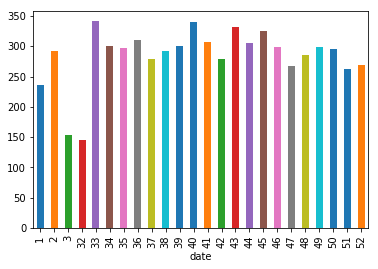

In [82]:
df.tweet.groupby(df["date"].dt.week).count().plot(kind="bar")

## SORT BY NUMBER OF FOLLOWERS

In [83]:
df.followers = df.followers.astype(int)
df.sort_values(by='followers',ascending=False,inplace=True)
df.head(25)

,date,followers,username,location,tweet
12252,2018-10-23 17:24:02,8015143,abpnewstv,India,"From #telecom to #automobile, top 5 industries..."
55091,2018-11-05 14:28:39,1153521,forbes_india,India,IN PICTURES | The first-ever show of art creat...
43831,2018-10-01 22:08:39,504191,LouisSerge,France,RT @edmuke: Should we be wary of #ArtificialIn...
7472,2018-09-17 19:10:23,500494,RichSimmondsZA,South Africa,RT @evankirstel: Artificial Intelligence is a ...
50604,2018-08-31 07:14:08,499433,RichSimmondsZA,South Africa,RT @evankirstel: Before You Fail at #Artificia...
30236,2018-12-14 12:16:14,498142,Androidheadline,"Los Angeles, CA",Amazon Wants You To Help Make Alexa Smarter ht...
4262,2018-08-10 00:40:19,442320,Deloitte,Global,How will #artificialintelligence transform #di...
52927,2018-12-05 06:16:26,278683,Montreal_AI,"Montréal, Québec",RT @future_timeline: BBC News - Portrait by AI...
16050,2018-09-22 05:53:05,278454,Montreal_AI,"Montréal, Québec",Who Is Going To Make Money In AI?Blog post by ...
1943,2018-10-07 07:02:37,226711,grattonboy,"London, United Kingdom",Can We Make Artificial Intelligence Accountabl...


In [84]:
#followers = list(df.followers)
#x = [i for i in range(len(followers))]
#plt.ylim(0,1500000)
#plt.xlim(0,1000)
#plt.bar(x,followers)
#plt.show()

## SPLIT INTO BEFORE AND AFTER

In [85]:
date_of_interest = datetime.datetime(2018,12,31,23,59)

In [86]:
print(date_of_interest)

2018-12-31 23:59:00


In [87]:
before = df[df.date < date_of_interest]
before.shape[0]

6165

In [88]:
after = df[df.date > date_of_interest]
after.shape[0]

654

In [89]:
before.head()

,date,followers,username,location,tweet
12252,2018-10-23 17:24:02,8015143,abpnewstv,India,"From #telecom to #automobile, top 5 industries..."
55091,2018-11-05 14:28:39,1153521,forbes_india,India,IN PICTURES | The first-ever show of art creat...
43831,2018-10-01 22:08:39,504191,LouisSerge,France,RT @edmuke: Should we be wary of #ArtificialIn...
7472,2018-09-17 19:10:23,500494,RichSimmondsZA,South Africa,RT @evankirstel: Artificial Intelligence is a ...
50604,2018-08-31 07:14:08,499433,RichSimmondsZA,South Africa,RT @evankirstel: Before You Fail at #Artificia...


In [90]:
btweets = list(before.tweet)
btweets[:10]

['From #telecom to #automobile, top 5 industries to be revolutionised by #ArtificialIntelligence in 2019Details:… https://t.co/ha73zbtvWY',
 'IN PICTURES | The first-ever show of art created by #ArtificialIntelligence just opened at the Nature Morte Gallery… https://t.co/2TjJbmocpu',
 'RT @edmuke: Should we be wary of #ArtificialIntelligence?#AI #ML HT @evankirstel @HikariBlue@Paula_Piccard @ipfconline1 @SpirosMargaris…',
 'RT @evankirstel: Artificial Intelligence is a great Sales Driver of the future. @ipfconline1 via @antgrasso #ArtificialIntelligence #Machin…',
 'RT @evankirstel: Before You Fail at #ArtificialIntelligence Get a Market/Validation for Business/Product/Strategy a Critical Analysis for B…',
 'Amazon Wants You To Help Make Alexa Smarter https://t.co/Z8fBQCnQQE #Amazon #IOTNews #ArtificialIntelligenceNews… https://t.co/1v3l75MYAI',
 'How will #artificialintelligence transform #diagnostics? Deloitte’s Greg Reh leads the discussion on the future of… https://t.co/7SQhZ5monm'

In [91]:
after.head()

,date,followers,username,location,tweet
20823,2019-01-04 23:30:09,157890,TheIotWarehouse,"Rome, NY","#Intel #India #trains 99,000 people in #artifi..."
80850,2019-01-14 21:25:08,154941,Ronald_vanLoon,#NL. Also on Instagram http://bit.ly/2NwFjws,RT @Ronald_vanLoon: This #Robot could make far...
13973,2019-01-10 07:45:32,97572,EXPandAMP,Worldwide,RT @evankirstel: Going up? This #robot prefers...
80775,2019-01-18 08:00:00,84256,paoloigna1,None,RT @DevCleary: The 30 #EmergingTechnologies of...
45840,2019-01-12 23:10:44,77651,7wData,België,Brian Krzanich: Intel’s #AI Commitments to Del...


In [92]:
atweets = list(after.tweet)
atweets[:10]

['#Intel #India #trains 99,000 people in #artificialintelligence https://t.co/FvCGUlAR9v',
 'RT @Ronald_vanLoon: This #Robot could make farming your new weekend activityby @mashable |#ArtificialIntelligence #AI #MachineLearning #…',
 'RT @evankirstel: Going up? This #robot prefers to travel by elevator #ai #ArtificialIntelligence #MachineVision #MachineLearning #robotics…',
 'RT @DevCleary: The 30 #EmergingTechnologies of The Next Decade:RT @evankirstel#ArtificialIntelligence #Blockchain #FinTech #IoT #Health…',
 'Brian Krzanich: Intel’s #AI Commitments to Deliver a Better World#artificialintelligence (AI) is not only the next… https://t.co/5XYNvoQ1Os',
 'Insightful#ArtificialIntelligence - what do #developers REALLY think? https://t.co/JJxJZxopQu #fintech… https://t.co/0uSMvOMdd8',
 "For all the hype, AI still hasn't impacted the US economy #AI #ArtificialIntelligence https://t.co/vd1bvZ9cCx",
 'RT @orkun_teke: #ArtificialIntelligence is here. Will You Lead or Follow?',
 'RT @HaroldSi

### PLOT MONTHS

In [93]:
feb_date = datetime.datetime(2019,1,31,23,59)

In [94]:
jan = after[after.date < feb_date]

In [95]:
feb = after[after.date > feb_date]

In [96]:
dec_date = datetime.datetime(2018,11,30,23,59)

In [97]:
dec = before[before.date > dec_date]

In [98]:
dec_counts = dec.tweet.groupby(dec["date"].dt.day).count()

In [99]:
jan_counts = jan.tweet.groupby(jan['date'].dt.day).count()

In [100]:
feb_counts = feb.tweet.groupby(feb['date'].dt.day).count()

In [101]:
dates_data = pd.concat([dec_counts,jan_counts,feb_counts])

In [102]:
type(dates_data)

pandas.core.series.Series

#### DOCS FOR THE PANDAS PLOT METHOD: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

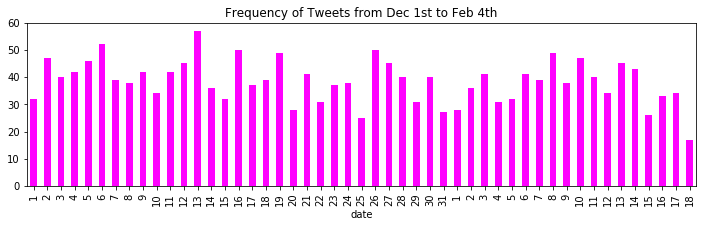

In [103]:
ax = dates_data.plot(kind='bar',figsize=(12,3),colormap='spring',\
                    title='Frequency of Tweets from Dec 1st to Feb 4th')

In [104]:
dldf = df

In [105]:
mldf = no_ai

## MAPPING USER LOCATIONS

In [106]:
citiestxt = open('cities.txt','r')
cities = []
for line in citiestxt:
    line = line.split('\t')
    names = []
    names.append(line[2])
    names = names + line[3].split(',')
    for i in range(len(names)):
        names[i] = names[i].lower()
    names.append(line[4])
    names.append(line[5])    
    cities.append(names)

In [107]:
locations = []
for l in mldf.location:
    try:
        l = l.split(',')
    except:
        print(l)
        continue
    for city in cities:
        if l[0].lower() in city:
            locations.append((float(city[-2]),float(city[-1])))

nan


In [108]:
locs1 = np.asarray(locations)

In [109]:
locations = []
for l in dldf.location:
    try:
        l = l.split(',')
    except:
        print(l)
        continue
    for city in cities:
        if l[0].lower() in city:
            locations.append((float(city[-2]),float(city[-1])))

In [110]:
locs2 = np.asarray(locations)

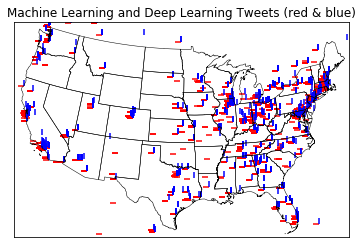

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
shp_info = m.readshapefile('./st99_d00','states',drawbounds=True)
x, y = m(locs1[:,1], locs1[:,0])
m.scatter(x, y,marker=0,color='r')
x, y = m(locs2[:,1], locs2[:,0])
m.scatter(x, y,marker=2,color='b')
plt.title('Machine Learning and Deep Learning Tweets (red & blue)')
plt.show()